# Import Libraries

In [6]:
from sklearn import datasets 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

# Import Dataset for Test

In this section, the code focuses on loading and preparing a dataset related to wine samples. The dataset, is imported from sklearn library to test the kNN algorithm later on. Each sample is characterized by 13 distinct features, which encompass aspects such as alcohol content and color intensity.

Initially, the code is tasked with loading the wine dataset and converting it into a DataFrame—a tabular format that facilitates data organization and manipulation. This enables a more streamlined and efficient approach to handling the data.

Subsequently, a subset of the original 13 features is selected to concentrate on the most pertinent or intriguing characteristics for the analysis at hand. In this instance, the features of interest include alcohol content, flavanoids (a class of natural compounds found in plants), color intensity, and ash (an indicator of the inorganic residue remaining after the wine undergoes heating).

The final step involves extracting the data from the DataFrame and partitioning it into two separate arrays. The first array, denoted as 'X', encompasses the values of the selected features for each wine sample. The second array, referred to as 'y', contains the target variable, which corresponds to the specific category or classification of wine to which each sample belongs.

In [7]:
# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

# Visualization and Exploration of the data

In this section, we present a code that creates a visual representation of the relationships between the selected features of the wine dataset. The purpose of this visualization is to help identify any possible correlations or patterns among the chosen characteristics. Moreover, the data exploration process typically involves numerous steps, including data cleaning and preprocessing. However, based on the provided description from sklearn, we can confidently assert that the dataset is clean and well-prepared for the application of machine learning algorithms.

The code defines two functions. The first function, one_plot, is responsible for creating individual plots based on a combination of features. It generates scatter plots when the row and column indices are different, which helps visualize the relationship between two distinct features. Additionally, the function computes the correlation coefficient for each pair of features, providing a numerical measure of the strength of their association. When the row and column indices are the same, one_plot creates histograms to display the distribution of a single feature across the dataset. These histograms are color-coded based on the target variable, which represents the type of wine.

The second function, myplotGrid, is responsible for arranging the individual plots generated by one_plot into a grid format. This grid consists of multiple rows and columns, with each cell containing a plot that represents a specific combination of features. The function iterates through all possible combinations of features, calling one_plot to create a visual representation for each pair.

Furthermore, myplotGrid includes some stylistic adjustments to improve the readability of the grid, such as removing unnecessary axis labels and setting appropriate labels for the rows and columns.

In [8]:
# define plotting function

def one_plot(ax, row_index, column_index, _x, _y, y, color_map, counter):
    #row_index is the axis index ax[r,c]
    
    if row_index != column_index:

        for c in color_map.keys():
            fill = np.where(y == c) #fitlering mask where y == 1 or y==2 or y==3...etc if exist

            if counter == 1: #I only want to add the legend for the one iteration

                ax[row_index,column_index].scatter(x = _x[fill], y = _y[fill] ,color=colormap[c], s=40 , marker='o' ,edgecolors=['w'], label = c)
                ax[row_index,column_index].set_title('Correlation Coef:\n {}'.format(np.corrcoef(_x[fill], _y[fill])[0,1]))

            else: #on other iteration, label is removed from plot meaning it will not be added to legend
                ax[row_index,column_index].scatter(x = _x[fill], y = _y[fill] ,color=colormap[c], s=40 , marker='o' ,edgecolors=['w'])
                ax[row_index,column_index].set_title('Correlation Coef:\n {}'.format(np.corrcoef(_x[fill], _y[fill])[0,1]))
            
            
    else: #for the plots in other places [0,1] or [1,2], where row_index is not equal to column_index
        for c in colormap.keys():
            fill = np.where(y == c)
            ax[row_index,column_index].hist( _x[fill] ,histtype="step", density=1, color = colormap[c],fill=True ,alpha=0.5, rwidth=0.8)
    
    
                
                
def myplotGrid(X, y , color_map):
    var_number = np.shape(X)[1]
    counter = 0
    fig, ax = plt.subplots(var_number,var_number, figsize=(13, 13))
    
    for i in range(var_number): 
        
        #styling a little bit
        ax[i,0].set_ylabel(selected_features[i])
        ax[var_number-1,i].set_xlabel(selected_features[i])    
        
        for j in range(var_number):
            
            #styling a little bit
            ax[i,j].spines['right'].set_visible(False) 
            ax[i,j].spines['top'].set_visible(False)
            if j != var_number-1:
                ax[j,i].tick_params(labelbottom = False)
            if i != 0:
                ax[j,i].tick_params(labelleft = False)
            
            _x = X[:,j] #slice the numpy for each column iteration
            _y = X[:,i] #slice the numpy for each row iteration
            
            #run the function for each iteration
            one_plot(ax, i, j, _x, _y, y , color_map, counter)
            
            counter = 1 + counter
            
    fig.legend(loc = "right", title = "Y - Value")  
    plt.show()      

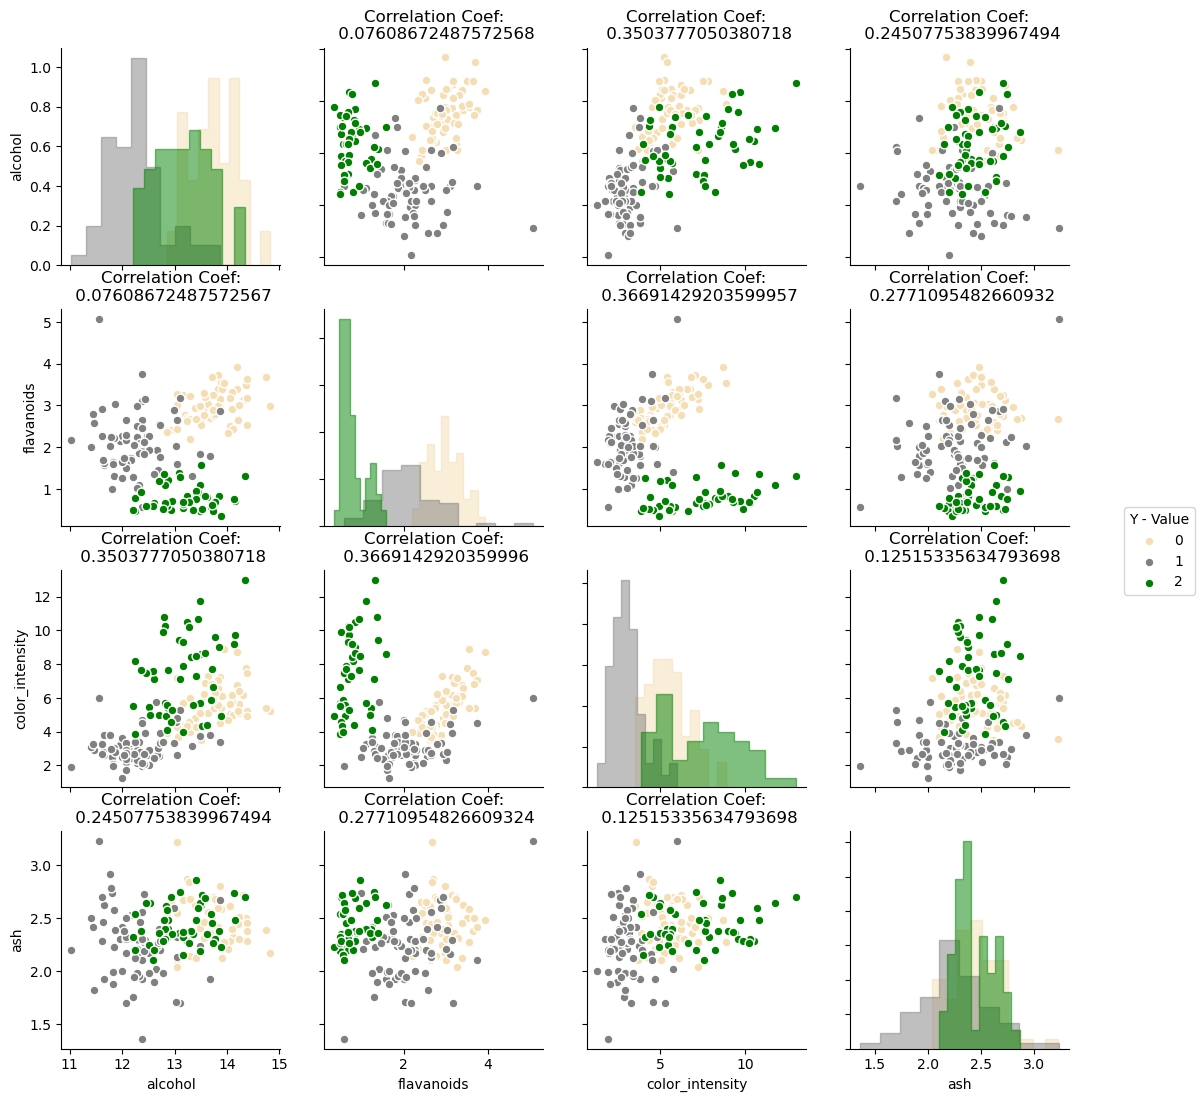

In [9]:
colormap = {0: "wheat", 1: "grey", 2: "green"}
myplotGrid(X,y,colormap)

# Implementing kNN


##### &emsp; Content
##### &emsp;&emsp; 1.1 Scaling Data & Splitting
&emsp;&emsp;&emsp; 1.1.1 Defining the Scaling and Split Functions<br>
&emsp;&emsp;&emsp; 1.1.2 Executing the function to scale and split the data<br>
##### &emsp;&emsp; 1.2 KNN Algorithim
&emsp;&emsp;&emsp; 1.2.1 Defining the KNN Functions<br>
&emsp;&emsp;&emsp; 1.2.2 Executing the mykNN function<br>
&emsp;&emsp;&emsp; 1.2.3 Executing the KNN Algorithim Using Already Available Public Libraries<br>

#### 1.1 Scaling Data & Splitting
For implementing the KNN algorithm, to increase the quality of the results, the data should be scaled on a standard scale. This is necessary because KNN is sensitive to scale since it measures distances between features. Some features may have a higher scale value than others, so transforming the data to a uniform scale is preferred. Several ways can be applied to scale the data, but standard scaling is commonly implemented. It changes the scale of the dataset from -1 to 0 and then to +1, meaning that it gives a normal distribution to the dataset and, therefore, is not very sensitive to outliers. Other options that are commonly used include MinMax scaling, which scales the data from 0 to +1, preserving the distribution shape of the dataset, but is more sensitive to outliers. In this study, I will apply the standard scaling method.

For testing my KNN algorithm, frist  I will use standard scaling to transform the X parameters. In machine learning algorithms, it is common to divide the data into a training and a test set. Therefore, I need a function to separate the data into training and testing sets to test the KNN function and to test my function for evaluation metrics.

##### 1.1.1 Defining the Scaling and Split Functions

In [17]:

"""
MinMax scaling Function.
however, it is out of scope for this study as we will proceed with only the standard scaling
"""
#Xscaled = (X − Xmin) / (Xmax−Xmin)
def min_max_scaling(array):
    rows = np.shape(array)[0]
    columns = np.shape(array)[1]
    placeholder = np.ones([rows, columns], dtype = float) #a placeholder array to replace with the minmax scaled data
    
    for i in range(columns):
        stdata = (array[:,i] - np.min(array[:,i])) / (np.max(array[:,i])-np.min(array[:,i]))
        placeholder[:,i] = placeholder[:,i] * stdata 
        
    return placeholder

"""
Standard scaling function.
"""
#Xscaled = (X – mean) / standard_deviation
def standard_scaling(array):
    rows = np.shape(array)[0]
    columns = np.shape(array)[1]
    placeholder = np.ones([rows, columns], dtype = float) #a placeholder array to replace with the satandarized data
    
    for i in range(columns):
        stdata = (array[:,i] - np.mean(array[:,i])) / np.std(array[:,i])
        placeholder[:,i] = placeholder[:,i] * stdata 
        
    return placeholder #I do not want to replace the values in the origional, otherwise, array[:,i]=scale formula could be used

"""
Train and Test Splitting function.
"""
def train_test_split(x, y, percentage):
    n = np.shape(x)[0]
    sample = int(percentage*n) #total sample of rows based on split percentages
    
    np.random.seed(12345)
    ind = np.random.permutation(n) #randomly permute or shuffle the indexes
    train_ind, test_ind = ind[:sample], ind[sample:] #slice indexes to test and train indexes
    x_train, x_test, y_train, y_test = x[train_ind,:], x[test_ind,:], y[train_ind,], y[test_ind,] #slice the array based on the sliced indexes
    return x_train, x_test, y_train, y_test


##### 1.1.2 Executing the functions to scale and split the data


In [18]:
X_scaled = standard_scaling(X) 

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, 0.7)


#### 1.2 KNN Algorithim

The k-NN algorithm is a widely-used technique in machine learning that can be employed for both classification and regression tasks. It works by analyzing the distances between data points to make predictions based on the majority vote of the k-nearest neighbors.

The code defines two primary functions: distance and neighbours. The distance function calculates the distance between two data points using various distance measures, such as Euclidean, Manhattan, or cosine distance. Depending on the chosen measure, this function computes the distance by taking into account the differences in the values of each feature.

The second function, neighbours, is responsible for finding the k-nearest neighbors for a given data point. It accepts several inputs, including the feature values (x_values), target values (y_values), the data point of interest (_x_row), the number of neighbors to consider (k), and the distance measure to use (dist_type). The function iterates through all data points in the dataset, calculates the distances using the specified distance measure, and sorts the data points based on their proximity to the point of interest. It then selects the k-nearest neighbors and makes a prediction based on the majority vote of these neighbors.

##### 1.2.1 Defining the KNN Functions

In [19]:
# helper code

def distance(point_0, point_1, dist_type):
    
    #Euclidean distance = √[(x2 – x1)2 + (y2 – y1)2].
    if dist_type == 'e': #for Euclidean distance
        dist = [(point_0[i] - point_1[i])**2 for i in range(len(point_0))]
        sum_dist = np.sqrt(np.sum(dist))

    #manhattan distance = |x1 - x2| + |y1 - y2|
    elif dist_type == 'm': #for manhattan distance
        dist = [(abs(point_0[i] - point_1[i])) for i in range(len(point_0))]
        sum_dist = np.sum(dist)     
    
    #cosine similarity = 1 - (A . B) / (||A|| ||B||)
    elif dist_type == 'c': #for cosine distance
        dist =  1 - (np.dot(point_0 , point_1) / ((abs(np.dot(point_0,point_0)) **0.5) *(abs(np.dot(point_1,point_1)) **0.5)))
        sum_dist = dist
        
    else:
        print("error, either write 'e' for Euclidean, or 'm' for Manhattan distance or 'cos' for cosine distanace" )
    
    return sum_dist

def neighbours(x_values, y_values ,_x_row , k, dist_type):
    
    distances = [] #list to store every calculated distances

    for index, x_row in enumerate(x_values): #for every row in X
        dis = distance(_x_row, x_row, dist_type)
        distances.append((y_values[index], dis)) #storing corresponding y value and distance
        distances.sort(key=lambda tup: tup[1])
        
    neighbors = [] #list to store the nearest neighbours
    for i in range(k):
        neighbors.append(distances[i][0]) # store the k number of values
        prediction = max(set(neighbors), key=neighbors.count) # returning the max value among k nearest neighbours
    return prediction        
    

In [20]:

def mykNN(x_values, y_values ,_x_values , k, dist_type):
    predicted_values = []
    for _x_row in _x_values:
        predicted_value = neighbours(x_values, y_values ,_x_row, k, dist_type)
        predicted_values.append(predicted_value)
    return predicted_values

##### 1.2.2 Executing the mykNN function

In [21]:
_y = mykNN(x_train,y_train ,x_test, 9, 'e') #instead of 'e' if 'm' will change the distance formula to Manhanttn
print(*_y)

1 1 0 0 1 2 2 1 0 0 2 0 2 2 1 2 1 1 1 2 2 1 2 1 0 1 2 1 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0


##### 1.2.3 Executing  the KNN Algorithim Using Already Available Public Libraries (sklearn)

In [22]:
from sklearn.neighbors import KNeighborsClassifier #importing the neccessary functions

classifier = KNeighborsClassifier(n_neighbors = 9, metric='euclidean')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(*y_pred)
print(_y == y_pred) #to check if there are any descripencies between my algorithim and sklearn library

1 1 0 0 1 2 2 1 0 0 2 0 2 2 1 2 1 1 1 2 2 1 2 1 0 1 2 1 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


# Model Evaluation
KNN and machine learning algorithms can be evaluated in numerous ways. In this example, I will use only four main metrics, including confusion matrix, total accuracy, precision, and recall. Further explanation for each metric as below:

- Confusion Matrix: It is a table that is used to show the number of correct and incorrect predictions on a classification problem when the real values of the Test Set are known. as below format:
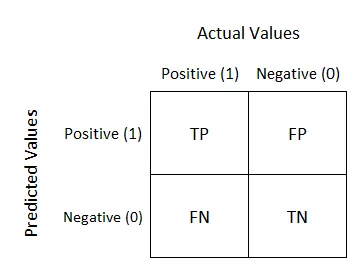

- Accuracy: It can be defined as the ratio of the number of correct predictions to the total number of predictions, also in case of binary classification it can be calculated as follow: 
$$ Accuracy = \frac{\mathbf{(TP + TN)}}{\mathbf{(TP + FP + TN + FN)}}$$



- Precision: What proportion of positive identifications was actually correct?

$$ Precision = \frac{\mathbf{(TP)}}{\mathbf{(TP + FP)}}$$

- Recall: What proportion of actual positives was identified correctly?

$$ Recall = \frac{\mathbf{(TP)}}{\mathbf{(TP + FN)}}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives

##### Definding the function for each evaluation metric


In [23]:
# confusion matrix, accuracy, precision, recall, etc. 

def myConfMat(y_test,y_pred,classno):
    #K = len(np.unique(true)) # Number of classes 
    result = np.zeros((classno, classno))
    for i in range(len(y_test)):
        result[y_test[i]][y_pred[i]] += 1
    return result


def myAccuracy(y_test,y_pred):
    count=0
    for i in range(len(y_pred)):
        if y_test[i] == y_pred[i]:
            count+=1
    a = count/len(y_pred)
    return a

def myPrecision(confusion_matrix):
    precision = np.zeros(np.shape(confusion_matrix)[0]) 
    
    true_positives = np.diag(confusion_matrix)
    false_positives = np.sum(confusion_matrix, axis=0) - true_positives
    precision = np.nan_to_num(np.divide(true_positives, (true_positives + false_positives)))

    return precision

def myRecall(confusion_matrix):
    recall = np.zeros(np.shape(confusion_matrix)[0]) 
    
    true_positives = np.diag(confusion_matrix)
    false_negatives = np.sum(confusion_matrix, axis=1) - true_positives
    recall = np.nan_to_num(np.divide(true_positives, (true_positives + false_negatives)))
    
    return recall


##### Executing the Function on the previoulsy ran models

In [24]:
# test evaluation code
"""
Calculating Metrics using my functions and my predictions
"""

myConfMatrix = myConfMat(y_test,_y,len(np.unique(y)))
myAccu = myAccuracy(y_test, _y)
myPreci = myPrecision(myConfMat(y_test,_y,len(np.unique(y))))
MyReca = myRecall(myConfMat(y_test,_y,len(np.unique(y))))

print('My Metrics:')
print("Confusion Matrix: \n", myConfMatrix, "\n")
print('classes   :      %s' % np.unique(_y))
print('Accuracy  :      %s' % myAccu)  
print('Precision :      %s' % myPreci)
print('Recall    :      %s' % MyReca)

"""
Calculating Metrics using sklearn library and sklearn predictions
"""
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score #importing the metrics from sklearn library

print('\nsklearn Metrics:')
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred), "\n")
print('classes   :      %s' % np.unique(y_pred) ) 
print('Accuracy  :      %s' % accuracy_score(y_test,y_pred))  
print('Precision :      %s' % precision_score(y_test,y_pred,average=None))  
print('Recall    :      %s' % recall_score(y_test,y_pred,average=None))  

My Metrics:
Confusion Matrix: 
 [[13.  0.  0.]
 [ 1. 23.  0.]
 [ 0.  0. 17.]] 

classes   :      [0 1 2]
Accuracy  :      0.9814814814814815
Precision :      [0.92857143 1.         1.        ]
Recall    :      [1.         0.95833333 1.        ]

sklearn Metrics:
Confusion Matrix: 
 [[13  0  0]
 [ 1 23  0]
 [ 0  0 17]] 

classes   :      [0 1 2]
Accuracy  :      0.9814814814814815
Precision :      [0.92857143 1.         1.        ]
Recall    :      [1.         0.95833333 1.        ]


# The End